# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [38]:
import requests
import matplotlib.pyplot as plt


In [21]:
import pandas as pd 

In [3]:
buscar = "Protector Solar"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Protector Solar","paging":{"total":2975,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA901447311","title":"Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml","condition":"new","thumbnail_id":"641809-MLA44740405275_012021","catalog_product_id":"MLA16048315","listing_type_id":"gold_special","permalink":"https://www.mercadolibre.com.ar/protector-solar-dermaglos-fps-50-fps-50-en-emulsion-de-250-ml/p/MLA16048315","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA392400","domain_id":"MLA-SUNSCREENS","thumbnail":"http://http2.mlstatic.com/D_641809-MLA44740405275_012021-I.jpg","currency_id":"ARS","order_backend":1,"price":7404,"original_price":8019,"sale_price":null,"sold_quantity":500,"available_quantity":500,"official_store_id":1859,"official_store_name":"Farmacias Selma","use_thumbnail_id":true,"accepts_mercadopago":true,"tags":["good_quality_thumbnail","brand_verified","loyalty_dis

In [11]:
data = response.json()
#type(data) # dict
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'Protector Solar',
 'paging': {'total': 2975, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA901447311',
   'title': 'Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml',
   'condition': 'new',
   'thumbnail_id': '641809-MLA44740405275_012021',
   'catalog_product_id': 'MLA16048315',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.ar/protector-solar-dermaglos-fps-50-fps-50-en-emulsion-de-250-ml/p/MLA16048315',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA392400',
   'domain_id': 'MLA-SUNSCREENS',
   'thumbnail': 'http://http2.mlstatic.com/D_641809-MLA44740405275_012021-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 7404,
   'original_price': 8019,
   'sale_price': None,
   'sold_quantity': 500,
   'available_quantity': 500,
   'official_store_id': 1859,
   'official_store_name': 'Farmacias 

In [33]:
data['results'][0]['title']

'Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml'

In [35]:
# Vemos el precio del primer resultado de la búsqueda
print('Precio del primer resultado:', data['results'][0]['price'])



precios_df = precios_df = pd.DataFrame(columns=['Title', 'Price'])

for elemento in range(len(data['results'])):
    precios_df = precios_df.append({'Title': data['results'][elemento]['title'], 'Price': data['results'][elemento]['price']}, ignore_index=True)

print(precios_df)



Precio del primer resultado: 7404
                                                Title     Price
0   Protector Solar Dermaglós Fps 50 Fps 50 En Emu...      7404
1   Protector Solar Lidherma Fps 40 En Crema 1 Uni...    6118.3
2   Eucerin Protector Solar Facial Hydro Fluid Fps...     11543
3   Protector Solar La Roche-posay Anthelios Xl Fp...     19380
4   Fotoprotector Isdin Spf 50+ Gel Crema Protecto...  15758.92
5       Dermaglós Solar Fps 50 Emulsión - 50 - 380 Ml     10669
6   Fotoprotector Isdin Fusion Water Color Ligth  ...  16538.96
7   Isdin Foto Ultra Active Unify Fusion Fluid Col...  19802.55
8   Anthelios Uvmune 400 Fluido Invisible50+ La Ro...     12232
9   Isdin Fotoprotector Spf50+ Fusion Water Toque ...     14137
10  Vichy Capital Soleil Fps50 Agua Protección Sol...     19595
11  Protector Solar Eucerin Oil Control Fps 50 Toq...  12525.84
12  Isdin Eryfotona Spf99 Fluid Protector Solar Pi...     27957
13  Protector Solar Dermaglós Fps 40 Fps 40 Efecto...    8730.5
14  Pr

In [37]:
precio_maximo = precios_df['Price'].max()

precio_minimo = precios_df['Price'].min()

precio_promedio = precios_df['Price'].mean()

print(f"Precio máximo: {precio_maximo}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio promedio: {precio_promedio}")

Precio máximo: 31702
Precio mínimo: 2521
Precio promedio: 12501.952999999998


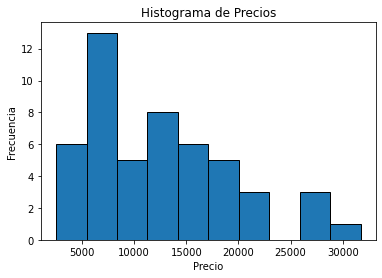

In [39]:
plt.hist(precios_df['Price'], bins=10, edgecolor='k') 

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

plt.show()